# **IMPORT LIBRARIES**

In [22]:
import pandas as pd
import numpy as np

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# **LOAD DATASET**

In [25]:

file_path = "../data/Delivery_Logistics.csv"

In [26]:
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully")
print("Shape of dataset:", df.shape)

Dataset Loaded Successfully
Shape of dataset: (25000, 15)


# **SCHEMA & STRUCTURE**

In [27]:
print("Column Names:")
print(df.columns.tolist())

Column Names:
['delivery_id', 'delivery_partner', 'package_type', 'vehicle_type', 'delivery_mode', 'region', 'weather_condition', 'distance_km', 'package_weight_kg', 'delivery_time_hours', 'expected_time_hours', 'delayed', 'delivery_status', 'delivery_rating', 'delivery_cost']


In [28]:
print("Dataset Schema Information:")
df.info()

Dataset Schema Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   delivery_id          25000 non-null  float64
 1   delivery_partner     25000 non-null  object 
 2   package_type         25000 non-null  object 
 3   vehicle_type         25000 non-null  object 
 4   delivery_mode        25000 non-null  object 
 5   region               25000 non-null  object 
 6   weather_condition    25000 non-null  object 
 7   distance_km          25000 non-null  float64
 8   package_weight_kg    25000 non-null  float64
 9   delivery_time_hours  25000 non-null  object 
 10  expected_time_hours  25000 non-null  object 
 11  delayed              25000 non-null  object 
 12  delivery_status      25000 non-null  object 
 13  delivery_rating      25000 non-null  int64  
 14  delivery_cost        25000 non-null  float64
dtypes: float

In [29]:
df.head()

,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delivery_time_hours,expected_time_hours,delayed,delivery_status,delivery_rating,delivery_cost
0,250.99,delhivery,automobile parts,bike,same day,west,clear,297.0,46.96,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000008,no,delivered,3,1632.7206
1,250.99,xpressbees,cosmetics,ev van,express,central,cold,89.6,47.39,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,no,delivered,5,640.1700
2,250.99,shadowfax,groceries,truck,two day,east,rainy,273.5,26.89,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000016,no,delivered,4,1448.1700
3,250.99,dhl,electronics,ev van,same day,east,cold,269.7,12.69,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,no,delivered,3,1486.5700
4,250.99,dhl,clothing,van,two day,north,foggy,256.7,37.02,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000016,no,delivered,4,1394.5600


# **MISSING VALUES ANALYSIS**

In [30]:
# Calculate missing values count
missing_count = df.isnull().sum()

In [31]:
# Calculate missing percentage
missing_percentage = (missing_count / len(df)) * 100

In [32]:
# Missing values summary
missing_summary = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percentage': missing_percentage
}).sort_values(by='Missing_Percentage', ascending=False)

missing_summary

,Missing_Count,Missing_Percentage
delivery_id,0,0.0
delivery_partner,0,0.0
package_type,0,0.0
vehicle_type,0,0.0
delivery_mode,0,0.0
region,0,0.0
weather_condition,0,0.0
distance_km,0,0.0
package_weight_kg,0,0.0
delivery_time_hours,0,0.0


# **Duplicate Records Check**

In [33]:
# Total number of duplicate rows
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [34]:
# Percentage of duplicates
duplicate_percentage = (duplicate_count / len(df)) * 100
print(f"Percentage of duplicate rows: {duplicate_percentage:.2f}%")


Percentage of duplicate rows: 0.00%


# **NUMERICAL SUMMARY**

In [35]:
numeric_summary = df.describe().T
numeric_summary

,count,mean,std,min,25%,50%,75%,max
delivery_id,25000.0,12500.500000,7212.732314,250.9900,6250.75,12500.500,18750.25,24750.0100
distance_km,25000.0,150.390436,86.409745,3.6000,75.90,151.000,224.90,297.1000
package_weight_kg,25000.0,25.145898,14.368663,0.6700,12.68,25.145,37.66,49.5200
delivery_rating,25000.0,3.666000,1.149964,1.0000,3.00,4.000,5.00,5.0000
delivery_cost,25000.0,864.944579,435.712593,95.6674,490.80,867.535,1237.91,1632.7206


# **NUMERICAL DISTRIBUTIONS**

In [36]:
# Select only numeric columns from dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['delivery_id', 'distance_km', 'package_weight_kg', 'delivery_rating', 'delivery_cost'], dtype='object')


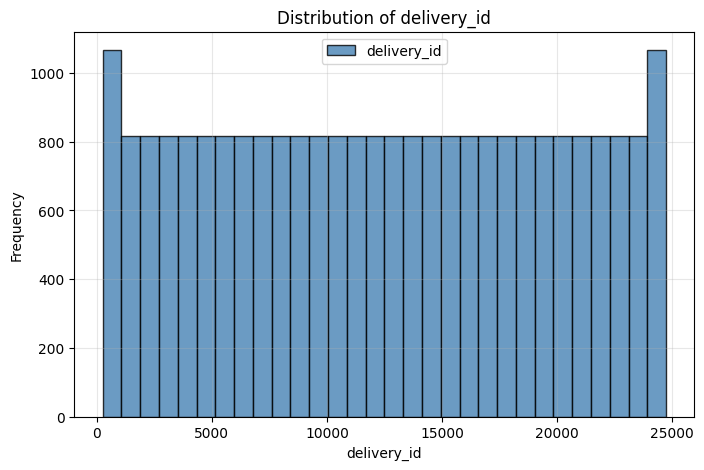

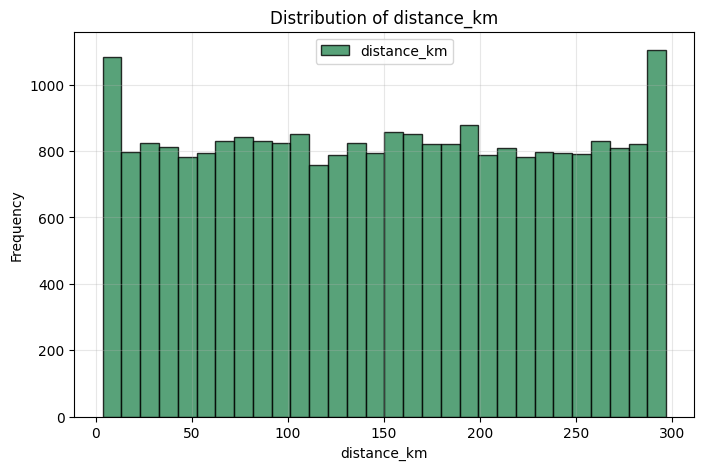

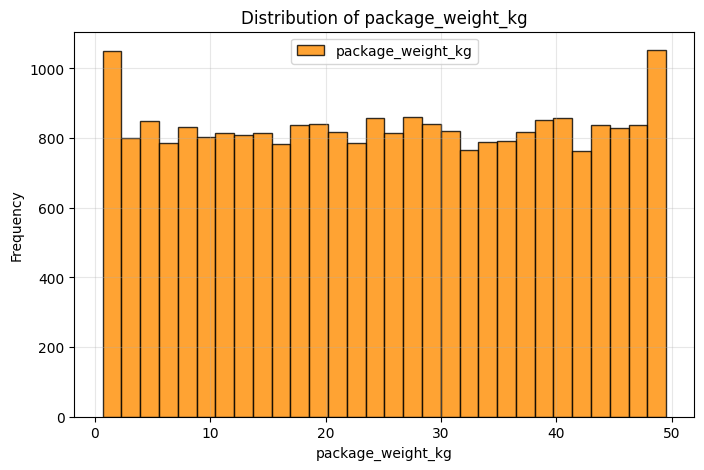

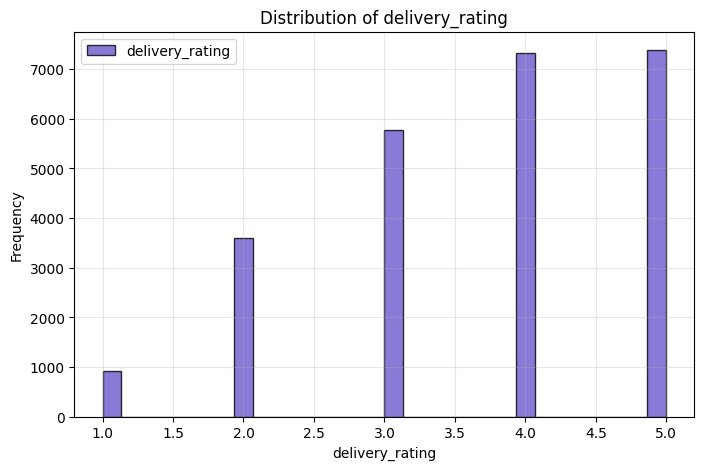

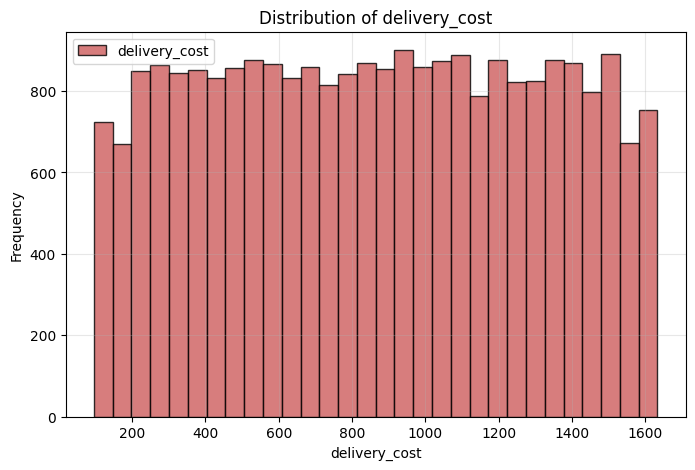

In [37]:
colors = ['steelblue', 'seagreen', 'darkorange', 'slateblue', 'indianred']

for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(8, 5))
    plt.hist(
        df[col],
        bins=30,
        color=colors[i % len(colors)],
        edgecolor='black',
        alpha=0.8,
        label=col
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


# **CATEGORICAL SUMMARY**

In [38]:
#Percentage of total records belonging to each category.
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nColumn: {col}")
    print("Unique values:", df[col].nunique())
    print(df[col].value_counts(normalize=True).head(10) * 100)


Column: delivery_partner
Unique values: 9
delivery_partner
xpressbees          11.304
fedex               11.272
dhl                 11.208
ekart               11.204
blue dart           11.192
delhivery           11.144
shadowfax           10.944
ecom express        10.888
amazon logistics    10.844
Name: proportion, dtype: float64

Column: package_type
Unique values: 9
package_type
fragile items       11.392
pharmacy            11.240
documents           11.220
automobile parts    11.180
electronics         11.168
clothing            11.068
furniture           10.984
cosmetics           10.976
groceries           10.772
Name: proportion, dtype: float64

Column: vehicle_type
Unique values: 6
vehicle_type
ev bike    16.872
van        16.748
scooter    16.696
bike       16.640
truck      16.580
ev van     16.464
Name: proportion, dtype: float64

Column: delivery_mode
Unique values: 4
delivery_mode
two day     25.208
same day    25.116
express     24.932
standard    24.744
Name: proport

# **CATEGORICAL DISTRIBUTIONS**

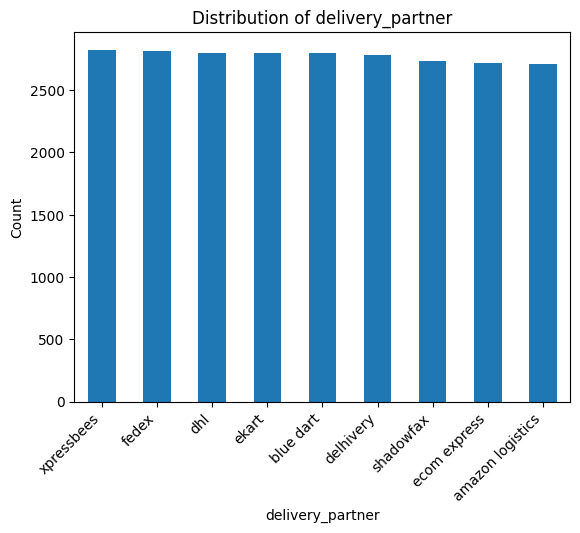

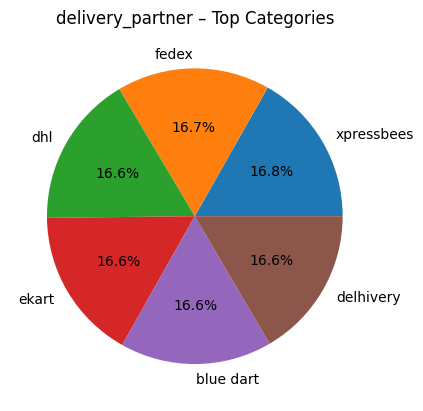

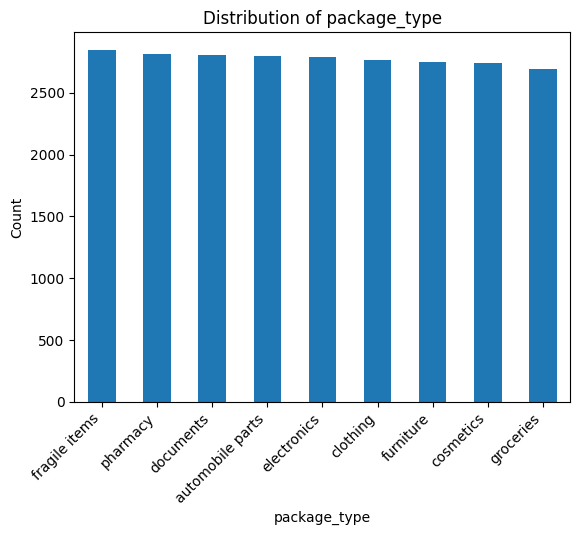

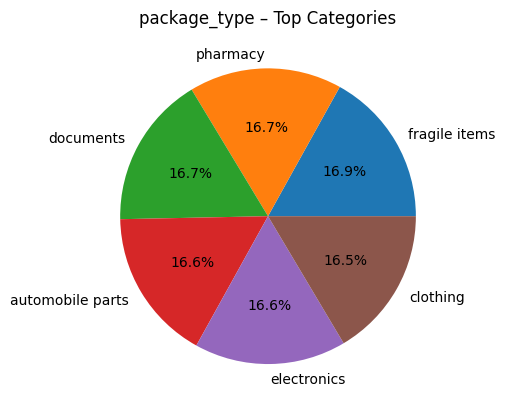

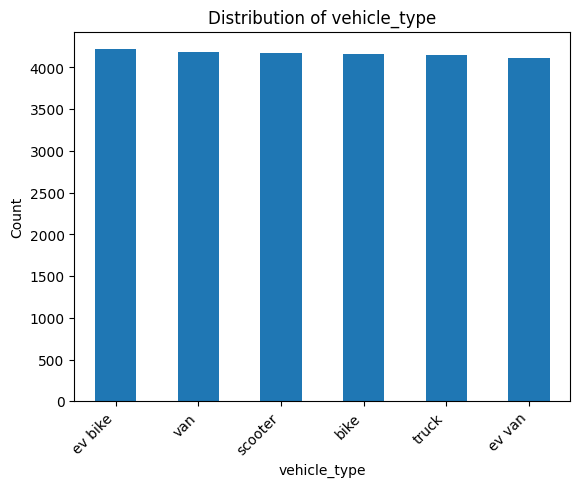

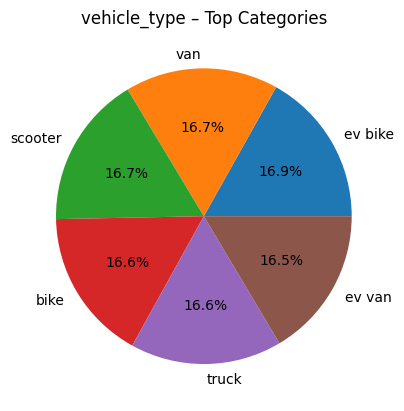

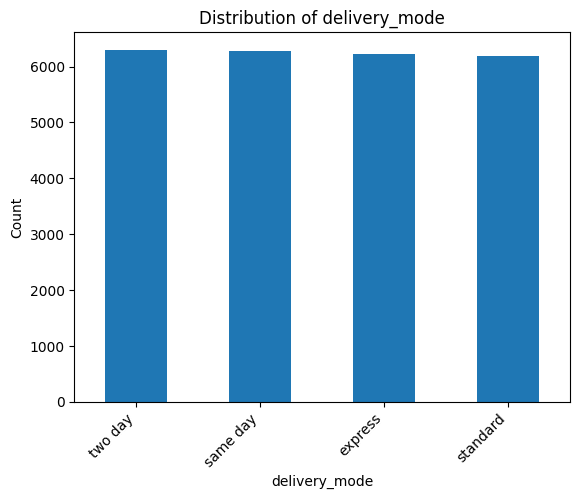

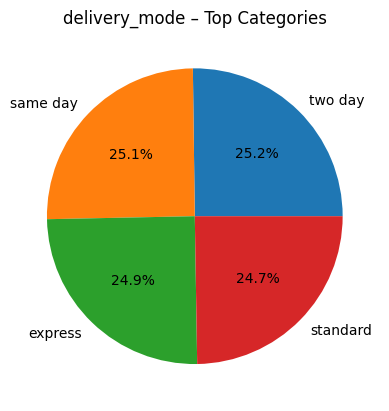

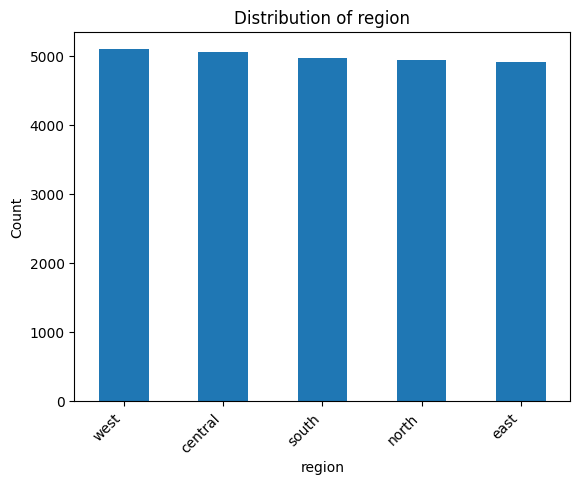

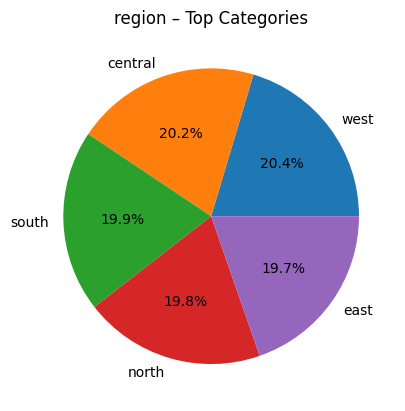

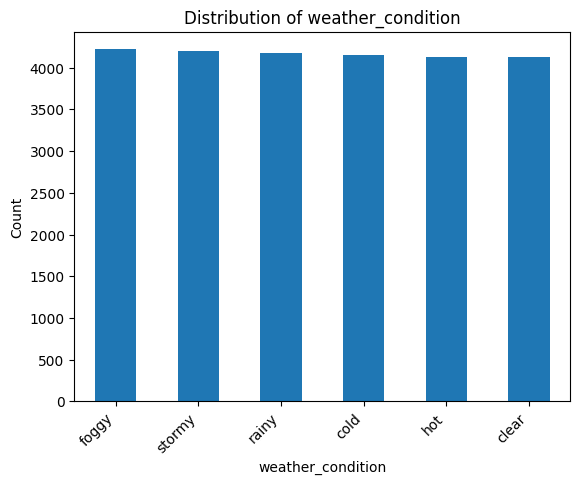

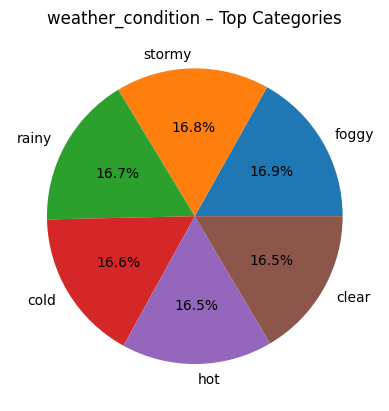

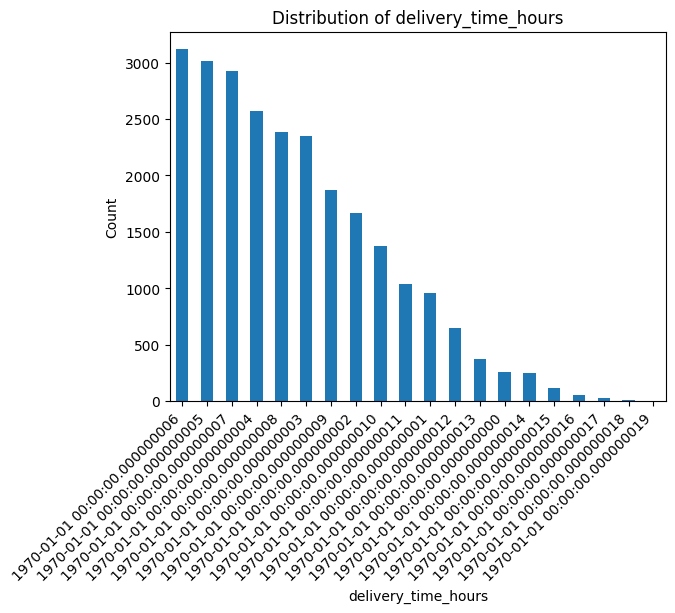

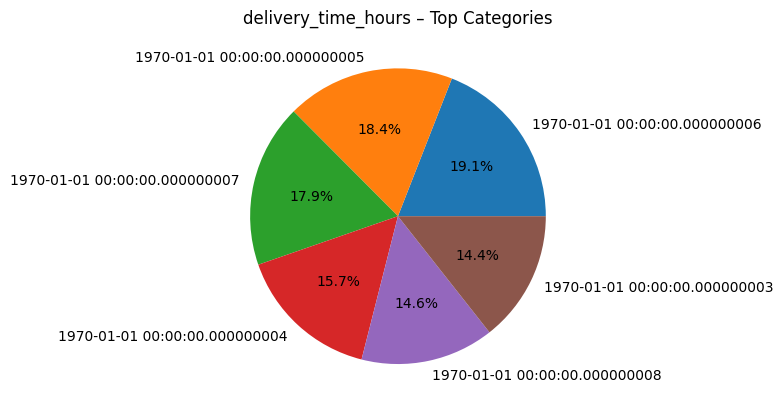

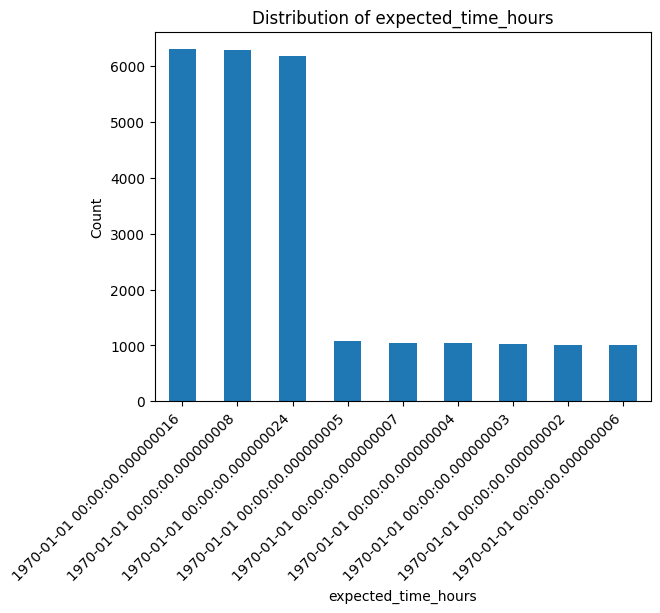

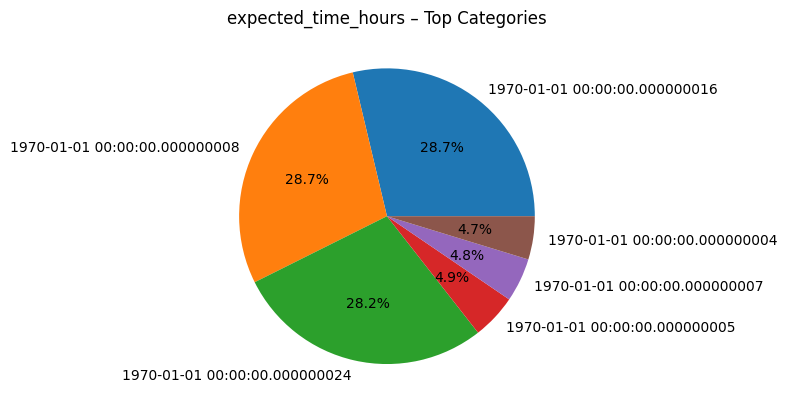

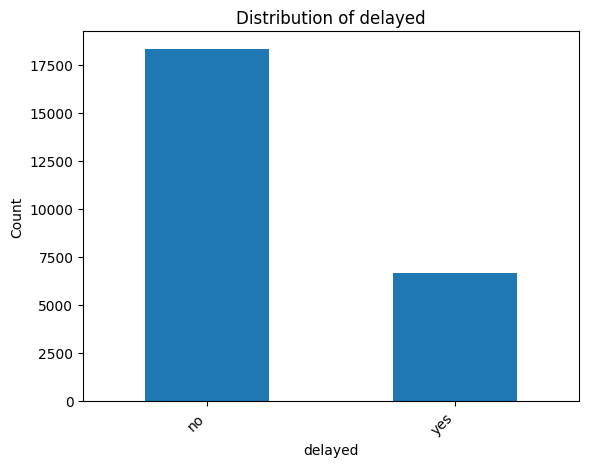

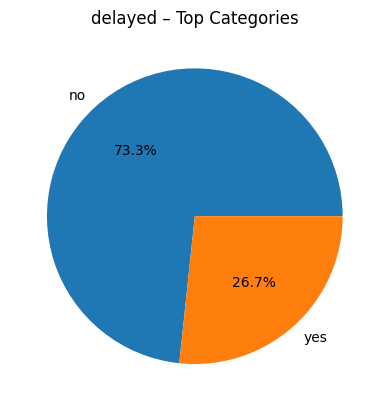

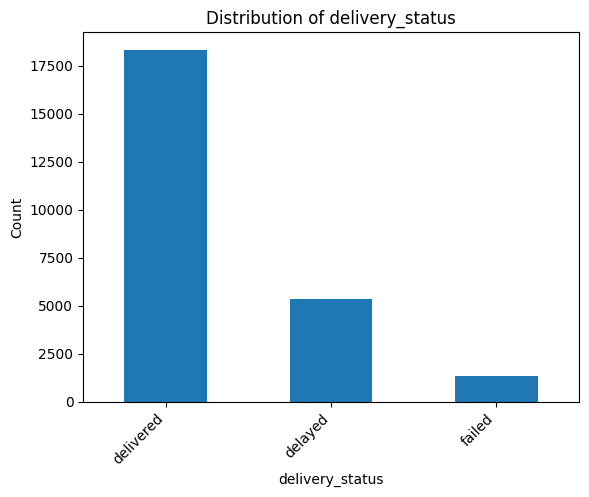

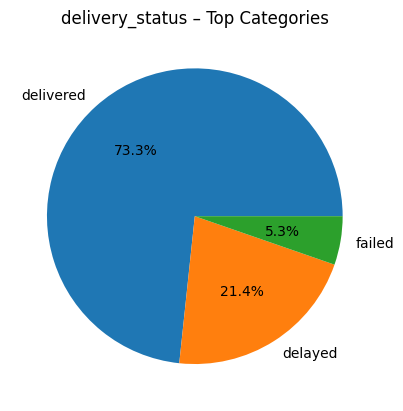

In [39]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    value_counts = df[col].value_counts()

    # BAR CHART

    plt.figure()
    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()


    # PIE CHART
    plt.figure()
    value_counts.head(6).plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{col} – Top Categories')
    plt.ylabel('')
    plt.show()


# **WEATHER vs DELIVERY STATUS**

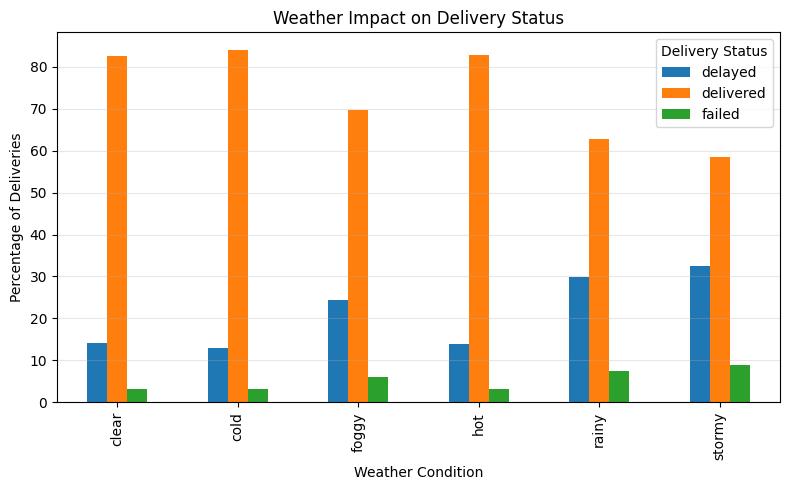

In [40]:
weather_delay = pd.crosstab(
    df['weather_condition'],
    df['delivery_status'],
    normalize='index'
) * 100

weather_delay.plot(kind='bar', figsize=(8, 5))
plt.title('Weather Impact on Delivery Status')
plt.xlabel('Weather Condition')
plt.ylabel('Percentage of Deliveries')
plt.legend(title='Delivery Status')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **REGION-WISE DELAY ANALYSIS**

region
central    27.252964
west       26.947988
south      26.783203
north      26.571024
east       25.797926
Name: delayed, dtype: float64


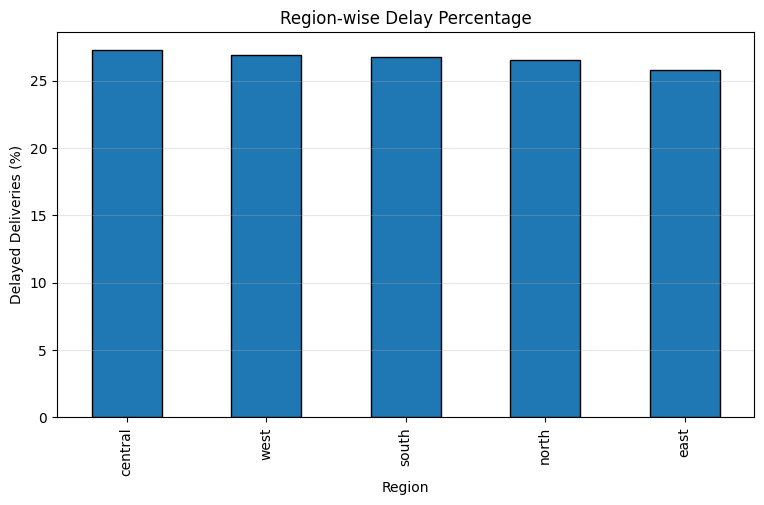

In [41]:
region_delay_pct = (
    df.groupby("region")["delayed"]
    .apply(lambda x: (x == "yes").mean() * 100)
    .sort_values(ascending=False)
)

print(region_delay_pct)


region_delay_pct.plot(kind="bar", figsize=(9,5), edgecolor="black")

plt.title("Region-wise Delay Percentage")
plt.xlabel("Region")
plt.ylabel("Delayed Deliveries (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()


# **VEHICLE TYPE vs DELAY**

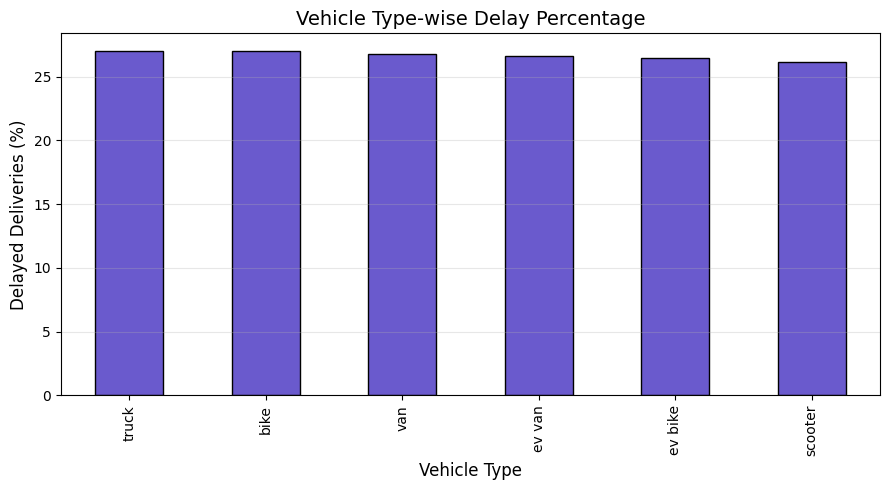

In [45]:
vehicle_delay = (
    df.groupby("vehicle_type")["delayed"]
    .apply(lambda x: (x == "yes").mean() * 100)
    .sort_values(ascending=False)
)

plt.figure(figsize=(9, 5))
vehicle_delay.plot(kind="bar", color="slateblue", edgecolor="black")
plt.title("Vehicle Type-wise Delay Percentage", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Delayed Deliveries (%)", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


# **DISTANCE vs DELAY**

<Figure size 700x500 with 0 Axes>

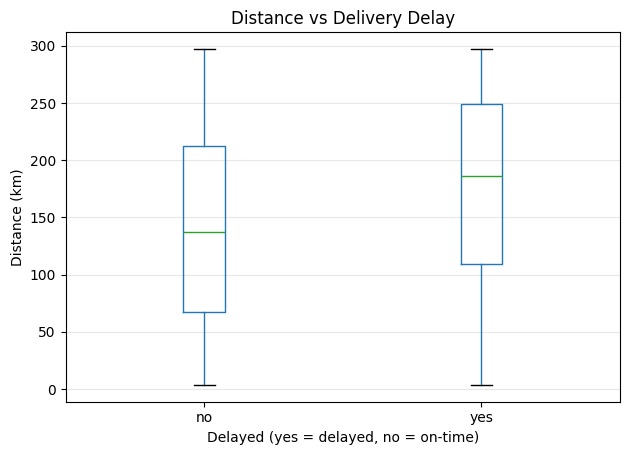

In [47]:
plt.figure(figsize=(7, 5))

df.boxplot(
    column='distance_km',
    by='delayed',
    grid=False
)

plt.title('Distance vs Delivery Delay')
plt.suptitle('')
plt.xlabel('Delayed (yes = delayed, no = on-time)')
plt.ylabel('Distance (km)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# **COLUMN-WISE OUTLIER DETECTION**

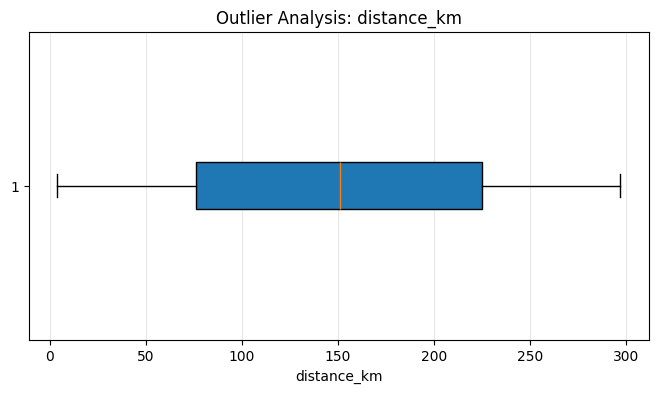

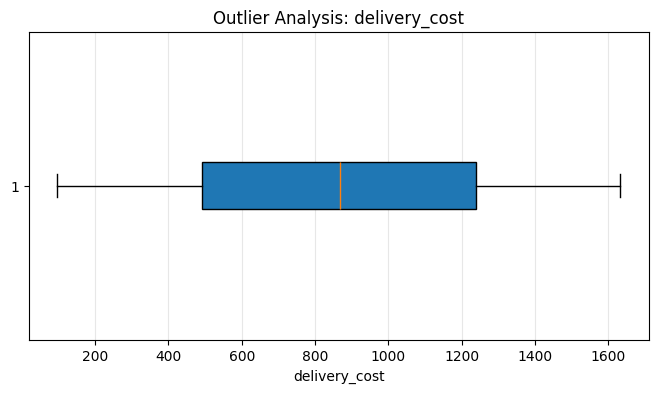

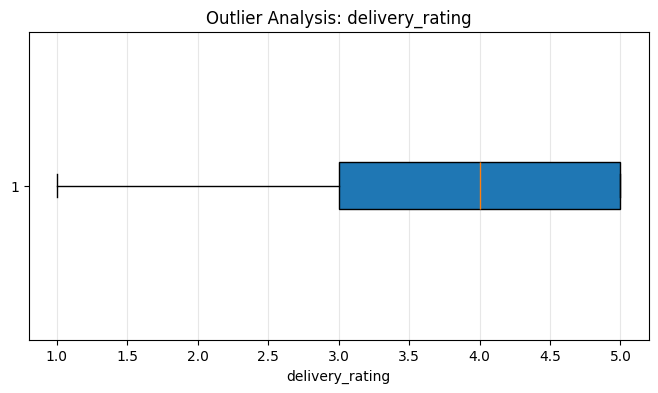

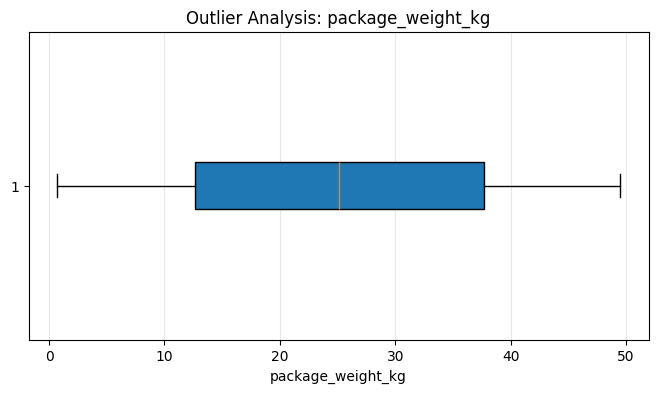

In [48]:
outlier_columns = [
    "distance_km",
    "delivery_cost",
    "delivery_rating",
    "package_weight_kg"
]

for col in outlier_columns:
    plt.figure(figsize=(8, 4))

    plt.boxplot(
        df[col],
        vert=False,
        patch_artist=True
    )

    plt.title(f"Outlier Analysis: {col}")
    plt.xlabel(col)
    plt.grid(axis="x", alpha=0.3)
    plt.show()


# **CORRELATION HEATMAP**

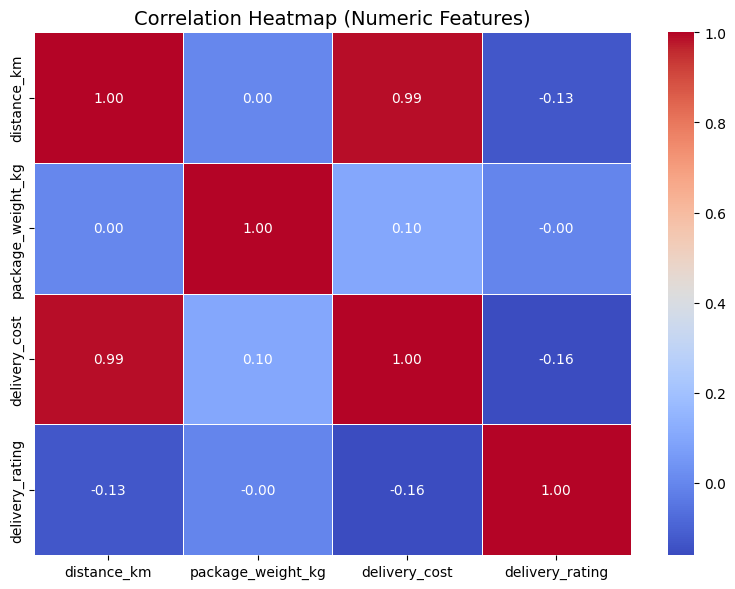

In [49]:
heatmap_columns = [
    'distance_km',
    'package_weight_kg',
    'delivery_cost',
    'delivery_rating'
]

corr_matrix = df[heatmap_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap (Numeric Features)", fontsize=14)
plt.tight_layout()
plt.show()


# **NUMERIC vs TARGET**

<Figure size 700x500 with 0 Axes>

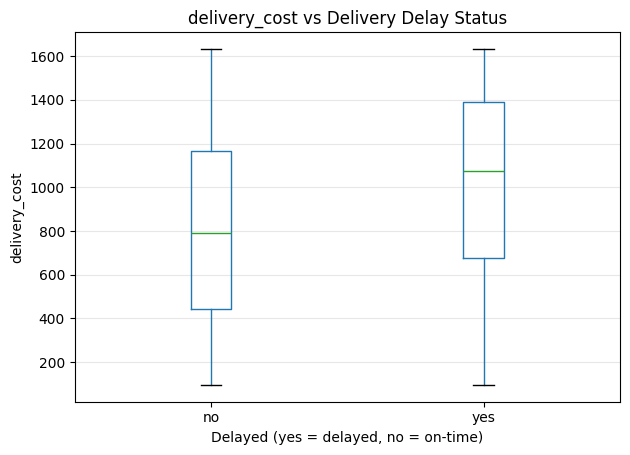

<Figure size 700x500 with 0 Axes>

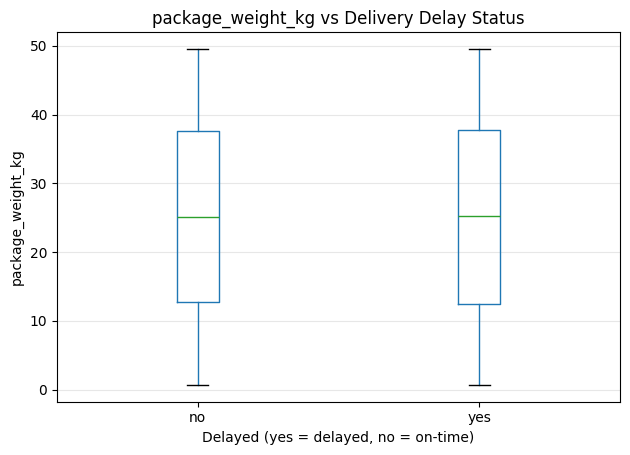

<Figure size 700x500 with 0 Axes>

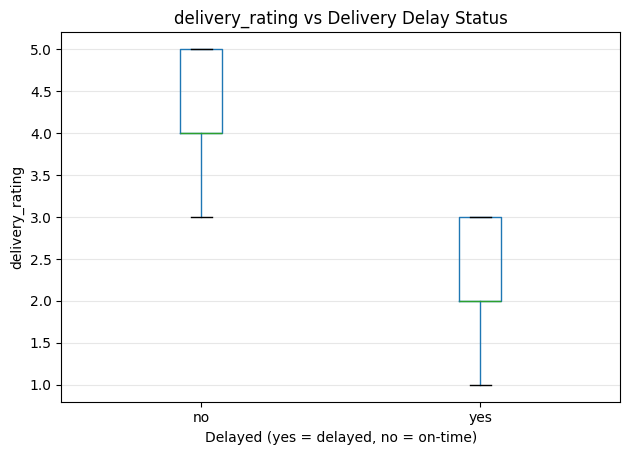

In [50]:
numeric_vs_target = [
    'delivery_cost',
    'package_weight_kg',
    'delivery_rating'
]

for col in numeric_vs_target:
    plt.figure(figsize=(7, 5))

    df.boxplot(
        column=col,
        by='delayed',   # existing column
        grid=False
    )

    plt.title(f'{col} vs Delivery Delay Status')
    plt.suptitle('')
    plt.xlabel('Delayed (yes = delayed, no = on-time)')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


# **Feature engineering**

Create Binary Target (delayed_flag)

In [51]:
# Clean delayed column
df["delayed"] = df["delayed"].str.strip().str.lower()

# Create delayed_flag (0 = On-time, 1 = Delayed)
df["delayed_flag"] = (df["delayed"] == "yes").astype(int)

df[["delayed", "delayed_flag"]].head()


,delayed,delayed_flag
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


Create Bad Weather Flag

In [52]:
bad_weather_list = ["rainy", "stormy", "foggy"]

df["bad_weather_flag"] = df["weather_condition"].apply(
    lambda x: 1 if x in bad_weather_list else 0
)

df[["weather_condition", "bad_weather_flag"]].head()


,weather_condition,bad_weather_flag
0,clear,0
1,cold,0
2,rainy,1
3,cold,0
4,foggy,1


Weather Severity Score

In [53]:
weather_map = {
    "clear": 0,
    "cloudy": 1,
    "hot": 1,
    "cold": 1,
    "rainy": 2,
    "foggy": 3,
    "stormy": 4
}

df["weather_severity"] = df["weather_condition"].map(weather_map)

df[["weather_condition", "weather_severity"]].head()


,weather_condition,weather_severity
0,clear,0
1,cold,1
2,rainy,2
3,cold,1
4,foggy,3


Cost Efficiency Feature (cost_per_km)

In [54]:
df["cost_per_km"] = df["delivery_cost"] / df["distance_km"]

df[["delivery_cost", "distance_km", "cost_per_km"]].head()


,delivery_cost,distance_km,cost_per_km
0,1632.7206,297.0,5.497376
1,640.1700,89.6,7.144754
2,1448.1700,273.5,5.294954
3,1486.5700,269.7,5.511939
4,1394.5600,256.7,5.432645


Weight Load Feature (weight_per_km)

In [55]:
df["weight_per_km"] = df["package_weight_kg"] / df["distance_km"]

df[["package_weight_kg", "distance_km", "weight_per_km"]].head()


,package_weight_kg,distance_km,weight_per_km
0,46.96,297.0,0.158114
1,47.39,89.6,0.528906
2,26.89,273.5,0.098318
3,12.69,269.7,0.047052
4,37.02,256.7,0.144215


Partner Delay Rate (Data-Driven Feature)

In [56]:
partner_delay = df.groupby("delivery_partner")["delayed_flag"].mean()

df["partner_delay_rate"] = df["delivery_partner"].map(partner_delay)

df[["delivery_partner", "partner_delay_rate"]].head()


,delivery_partner,partner_delay_rate
0,delhivery,0.248026
1,xpressbees,0.282732
2,shadowfax,0.273026
3,dhl,0.263383
4,dhl,0.263383


Region Delay Rate

In [57]:
region_delay = df.groupby("region")["delayed_flag"].mean()

df["region_delay_rate"] = df["region"].map(region_delay)

df[["region", "region_delay_rate"]].head()


,region,region_delay_rate
0,west,0.269480
1,central,0.272530
2,east,0.257979
3,east,0.257979
4,north,0.265710


Vehicle Delay Rate

In [58]:
vehicle_delay = df.groupby("vehicle_type")["delayed_flag"].mean()

df["vehicle_delay_rate"] = df["vehicle_type"].map(vehicle_delay)

df[["vehicle_type", "vehicle_delay_rate"]].head()


,vehicle_type,vehicle_delay_rate
0,bike,0.270433
1,ev van,0.266278
2,truck,0.270446
3,ev van,0.266278
4,van,0.267733


Delivery Mode Delay Rate

In [59]:
mode_delay = df.groupby("delivery_mode")["delayed_flag"].mean()

df["mode_delay_rate"] = df["delivery_mode"].map(mode_delay)

df[["delivery_mode", "mode_delay_rate"]].head()


,delivery_mode,mode_delay_rate
0,same day,0.325370
1,express,0.737847
2,two day,0.004284
3,same day,0.325370
4,two day,0.004284
